In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [18]:
df = pd.read_csv('eda_input_validation_joining_dataset1.csv')
df.head()

,date,number_of_strikes,center_point_geom,longitude,latitude
0,2018-01-03,194,POINT(-75 27),-75.0,27.0
1,2018-01-03,41,POINT(-78.4 29),-78.4,29.0
2,2018-01-03,33,POINT(-73.9 27),-73.9,27.0
3,2018-01-03,38,POINT(-73.8 27),-73.8,27.0
4,2018-01-03,92,POINT(-79 28),-79.0,28.0


In [19]:
df.describe(include='all')

,date,number_of_strikes,center_point_geom,longitude,latitude
count,3401012,3.401012e+06,3401012,3.401012e+06,3.401012e+06
unique,357,NaN,170855,NaN,NaN
top,2018-09-01,NaN,POINT(-81.5 22.5),NaN,NaN
freq,31773,NaN,108,NaN,NaN
mean,NaN,1.311403e+01,NaN,-9.081778e+01,3.374688e+01
std,NaN,3.212099e+01,NaN,1.296593e+01,7.838555e+00
min,NaN,1.000000e+00,NaN,-1.418000e+02,1.660000e+01
25%,NaN,2.000000e+00,NaN,-1.008000e+02,2.760000e+01
50%,NaN,4.000000e+00,NaN,-9.070000e+01,3.350000e+01
75%,NaN,1.200000e+01,NaN,-8.130000e+01,3.970000e+01


In [20]:
print(df.dtypes)

date                  object
number_of_strikes      int64
center_point_geom     object
longitude            float64
latitude             float64
dtype: object


In [25]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)


date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
longitude                   float64
latitude                    float64
dtype: object


In [22]:
print(df.isnull().sum())

date                 0
number_of_strikes    0
center_point_geom    0
longitude            0
latitude             0
dtype: int64


In [23]:
df.describe(include='all')
# NaN when date is a datetime object

,date,number_of_strikes,center_point_geom,longitude,latitude
count,3401012,3.401012e+06,3401012,3.401012e+06,3.401012e+06
unique,NaN,NaN,170855,NaN,NaN
top,NaN,NaN,POINT(-81.5 22.5),NaN,NaN
freq,NaN,NaN,108,NaN,NaN
mean,2018-07-13 03:32:02.018504960,1.311403e+01,NaN,-9.081778e+01,3.374688e+01
min,2018-01-01 00:00:00,1.000000e+00,NaN,-1.418000e+02,1.660000e+01
25%,2018-06-04 00:00:00,2.000000e+00,NaN,-1.008000e+02,2.760000e+01
50%,2018-07-18 00:00:00,4.000000e+00,NaN,-9.070000e+01,3.350000e+01
75%,2018-08-24 00:00:00,1.200000e+01,NaN,-8.130000e+01,3.970000e+01
max,2018-12-31 00:00:00,2.211000e+03,NaN,-4.320000e+01,5.170000e+01


In [24]:
# to see which days are missing
full_date_range = pd.date_range(start='2018-01-01', end='2018-12-31')


full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

<Axes: ylabel='number_of_strikes'>

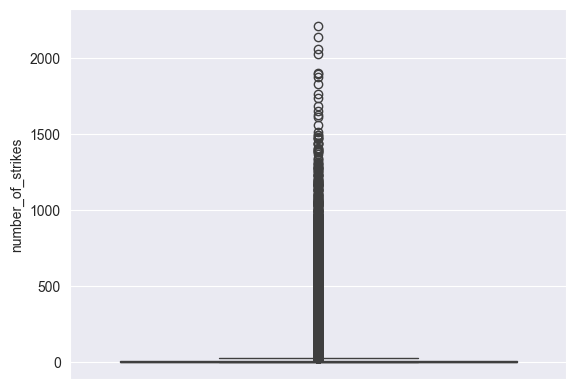

In [26]:
sns.boxplot(y = df['number_of_strikes'])

<Axes: ylabel='number_of_strikes'>

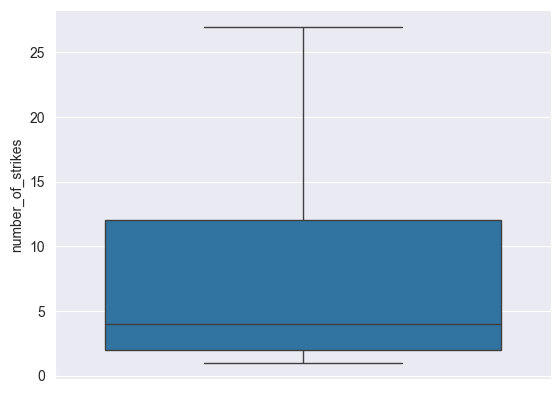

In [27]:
sns.boxplot(y = df['number_of_strikes'], showfliers=False)

In [28]:
df_points = df[['latitude', 'longitude']].drop_duplicates()
df_points.head()

,latitude,longitude
0,27.0,-75.0
1,29.0,-78.4
2,27.0,-73.9
3,27.0,-73.8
4,28.0,-79.0


In [29]:
p = px.scatter_geo(df_points, lat = 'latitude', lon = 'longitude')
p.show()